### Logistic Regression
Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

The dependent variable is categorical in nature. Dependent variable is also referred as target variable and the independent variables are called the predictors.

Logistic regression predicts the probability of the event using the log function.We use the Sigmoid function/curve to predict the categorical value. The threshold value decides the outcome(win/lose).

**Linear regression equation:    y = β0 + β1X1 + β2X2 …. + βnXn**

Y stands for the dependent variable that needs to be predicted.
β0 is the Y-intercept, which is basically the point on the line which touches the y-axis.
β1 is the slope of the line (the slope can be negative or positive depending on the relationship between the dependent variable and the independent variable.)
X here represents the independent variable that is used to predict our resultant dependent value.

### Sigmoid Function
A Sigmoid function is a mathematical function which has a characteristic S-shaped curve. There are a number of common sigmoid functions, such as the logistic function, the hyperbolic tangent, and the arctangent.<br>
In machine learning, the term
sigmoid function is normally used to refer specifically to the logistic function, also called the logistic sigmoid function.<br>
All sigmoid functions have the property that they map the entire number line into a small range such as between 0 and 1, or -1 and 1, so one use of a sigmoid function is to convert a real value into one that can be interpreted as a probability.

**Sigmoid function:    p = 1 / 1 + e^-y**

Apply sigmoid function on the linear regression equation.

**Logistic Regression equation:  p = 1 / 1 + e-(β0 + β1X1 + β2X2 …. + βnXn)**

### Application of Logistic Regression
1)Using the logistic regression algorithm, banks can predict whether a customer would default on loans or not<br>
2)To predict the weather conditions of a certain place (sunny, windy, rainy, humid, etc.)But logical regression would only predict categorical data, like if its going to rain or not.<br>
3)Ecommerce companies can identify buyers if they are likely to purchase a certain product<br>
4)Companies can predict whether they will gain or lose money in the next quarter, year, or month based on their current performance<br>
5)We can use logical regression with the help of the medical history of the patient to predict if the illness is positive or negative in any case.<br>

In [9]:
#SUV Predictions

#importing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('suv_data.csv')
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


<AxesSubplot:xlabel='Purchased', ylabel='count'>

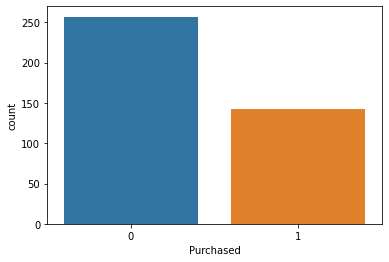

In [15]:
#Analyzing data
sns.countplot(x="Purchased",data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

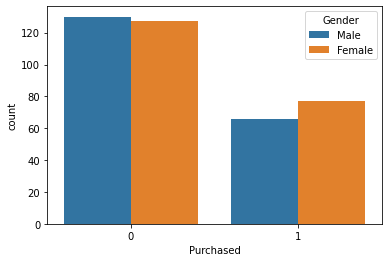

In [18]:
sns.countplot(x="Purchased",hue="Gender",data=df)

In [21]:
#data wrangling(cleaning the data)
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [22]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
#train data
x= df.iloc[:,[2,3]].values   #independent variable
y= df.iloc[:,4].values       #dependent variable
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

sc = StandardScaler()      #scalaring down for better performing(most useful incase of large da)
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)

classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
                                                  

LogisticRegression(random_state=0)

In [34]:
y_pred = classifier.predict(x_test)


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

89.0

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)    


array([[65,  3],
       [ 8, 24]], dtype=int64)

### Linear Regression vs Logistic Regression
 
Core Concept-<br>
In Linear Regression,the data is modelled using a straight line.
In Logistic Regression,the data is modelled using a sigmoid.

Used with- <br>
Linear Regression is used with continuous Variable.
Logistic Regression is used with categorical Variable

Output/Prediction-<br>
In Linear Regression, the outcome is the value of the variable 
In Logistic Regression, the outcome is the probability of occurrence of an event

Use-<br>
Linear Regression is used to solve regression problems.
Logistic Regression is used to solve classification problems.